In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\hp\Music\Online Retail.xlsx")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
InvoiceTime    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
df.shape

(536641, 9)

In [17]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [18]:
# Create a 'TotalPrice' column (Revenue per line item)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
#Total Revenue Generated 
total_revenue = df['TotalPrice'].sum()

print(f"Total Revenue Generated: ${total_revenue:,.2f}")

Total Revenue Generated: $9,726,006.95


In [20]:
# --- Group by product description and sum quantities ---
product_sales = df.groupby('Description', as_index=False)['Quantity'].sum()

In [21]:
#Best-Selling Product
best_selling = product_sales.loc[product_sales['Quantity'].idxmax()]
print("Best-Selling Product:")
print(f"Product: {best_selling['Description']}")
print(f"Total Quantity Sold: {best_selling['Quantity']:,}")

Best-Selling Product:
Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS
Total Quantity Sold: 53,751


In [22]:
#Least-Selling Product
least_selling = product_sales.loc[product_sales['Quantity'].idxmin()]
print("\nLeast-Selling Product:")
print(f"Product: {least_selling['Description']}")
print(f"Total Quantity Sold: {least_selling['Quantity']:,}")


Least-Selling Product:
Product: printing smudges/thrown away
Total Quantity Sold: -19,200


In [23]:
#average Order Value (AOV) per Invoice ---
invoice_revenue = df.groupby('InvoiceNo')['TotalPrice'].sum()
aov = invoice_revenue.mean()
print(f"\nAverage Order Value (AOV) per Invoice: ${aov:,.2f}")


Average Order Value (AOV) per Invoice: $375.52


In [24]:
#Number of Unique Customers
unique_customers = df['CustomerID'].nunique()
print(f"\nNumber of Unique Customers: {unique_customers}")


Number of Unique Customers: 4372


In [25]:
#Average Spending per Customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
avg_spending_per_customer = customer_spending.mean()
print(f"\nAverage Spending per Customer: ${avg_spending_per_customer:,.2f}")


Average Spending per Customer: $1,893.53


In [26]:
#Products that Contributed Most to Total Sales

product_revenue = df.groupby('Description', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)

top_5_products = product_revenue.head(5)
print("Top 5 Products by Total Revenue:")
print(top_5_products)

Top 5 Products by Total Revenue:
                             Description  TotalPrice
1098                      DOTCOM POSTAGE   206245.48
2915            REGENCY CAKESTAND 3 TIER   164459.49
3918  WHITE HANGING HEART T-LIGHT HOLDER    99612.42
2471                       PARTY BUNTING    98243.88
1866             JUMBO BAG RED RETROSPOT    92175.79


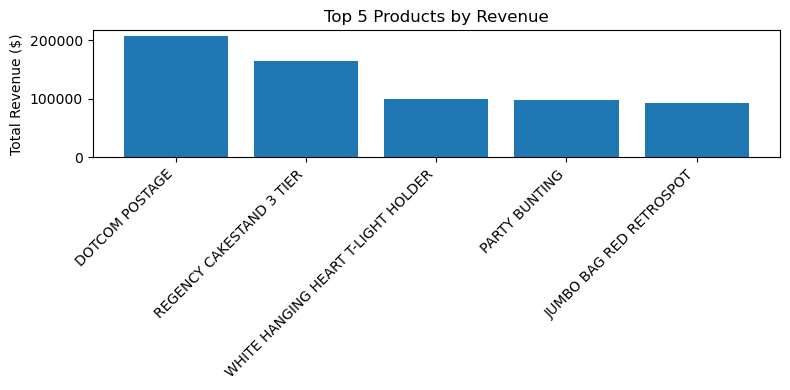

In [27]:
plt.figure(figsize=(8,4))
plt.bar(top_5_products['Description'], top_5_products['TotalPrice'])
plt.title('Top 5 Products by Revenue')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
#Countries with Highest and Lowest Revenue

country_revenue = df.groupby('Country', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)

highest_revenue_country = country_revenue.iloc[0]
lowest_revenue_country = country_revenue.iloc[-1]

print("\n🌍 Country with Highest Revenue:")
print(f"{highest_revenue_country['Country']} - ${highest_revenue_country['TotalPrice']:,.2f}")

print("\n💸 Country with Lowest Revenue:")
print(f"{lowest_revenue_country['Country']} - ${lowest_revenue_country['TotalPrice']:,.2f}")


🌍 Country with Highest Revenue:
United Kingdom - $8,167,128.18

💸 Country with Lowest Revenue:
Saudi Arabia - $131.17


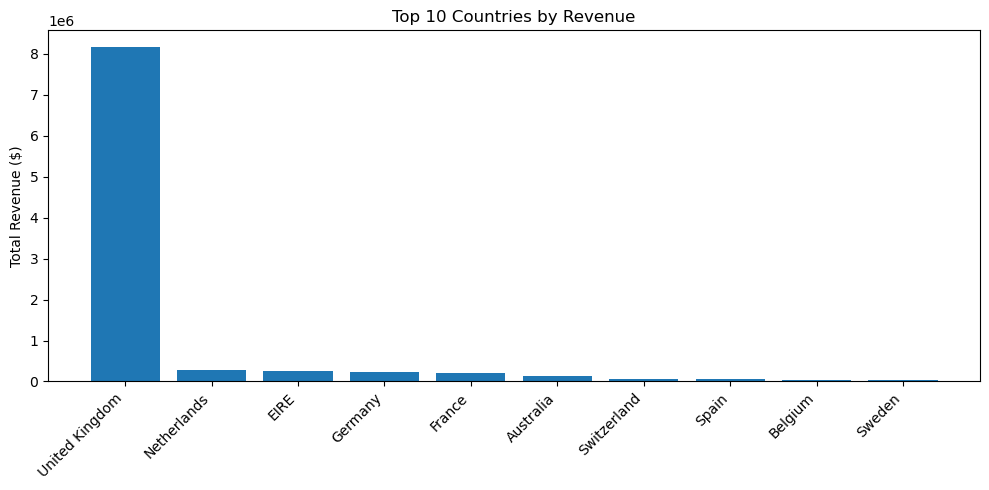

In [29]:
plt.figure(figsize=(10,5))
plt.bar(country_revenue['Country'][:10], country_revenue['TotalPrice'][:10])
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
#Overall Sales Trend Over Time
# Aggregate total revenue per month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

print("\n📅 Monthly Sales Trend:")
print(monthly_sales.head())


📅 Monthly Sales Trend:
  YearMonth  TotalPrice
0   2010-12  746723.610
1   2011-01  558448.560
2   2011-02  497026.410
3   2011-03  682013.980
4   2011-04  492367.841


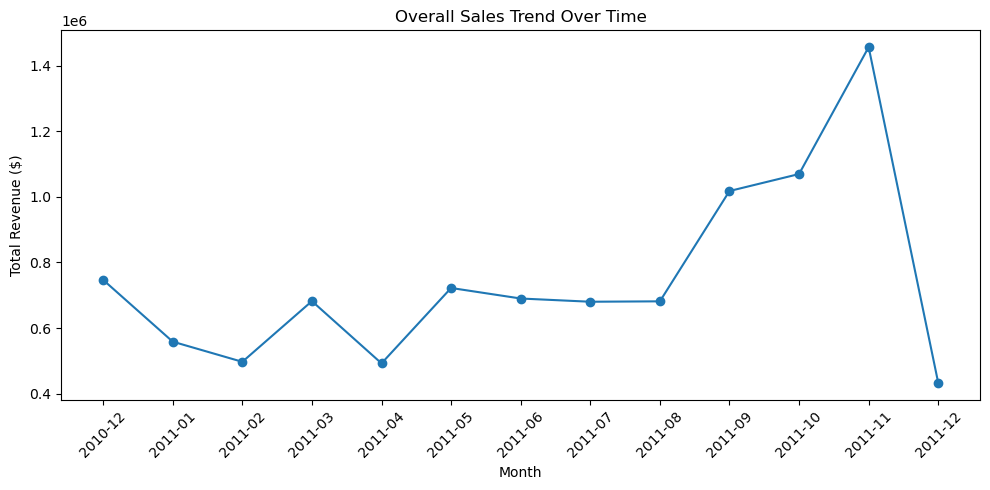

In [31]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalPrice'], marker='o')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
#Are there repeat customers? (Customer Retention Rate)

# Count number of transactions (invoices) per customer
customer_invoices = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Total number of customers
total_customers = customer_invoices.shape[0]

# Number of repeat customers (with more than 1 invoice)
repeat_customers = (customer_invoices > 1).sum()

# Retention rate = (Repeat Customers / Total Customers) × 100
retention_rate = (repeat_customers / total_customers) * 100

print(f"👥 Total Customers: {total_customers}")
print(f"🔁 Repeat Customers: {repeat_customers}")
print(f"📈 Customer Retention Rate: {retention_rate:.2f}%")

👥 Total Customers: 4372
🔁 Repeat Customers: 3059
📈 Customer Retention Rate: 69.97%


In [33]:
#Customers with Highest Purchase Frequency
customer_frequency = customer_invoices.sort_values(ascending=False).head(10)

print("\n🏆 Top 10 Customers by Purchase Frequency (Number of Invoices):")
print(customer_frequency)



🏆 Top 10 Customers by Purchase Frequency (Number of Invoices):
CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
15311.0    118
13089.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64


In [34]:
 #Countries with Most Active Customers
active_customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

print("\n🌍 Top 10 Countries by Number of Active Customers:")
print(active_customers_by_country.head(10))


🌍 Top 10 Countries by Number of Active Customers:
Country
United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64


In [35]:
#Assuming InvoiceTime is in format 'HH:MM:SS' or 'HH:MM'
df['Hour'] = pd.to_datetime(df['InvoiceTime'], format='%H:%M:%S', errors='coerce').dt.hour

# Peak Sales Hours During the Day

hourly_sales = df.groupby('Hour')['TotalPrice'].sum().sort_index()

print("⏰ Sales by Hour:")
print(hourly_sales)

⏰ Sales by Hour:
Hour
6        -497.350
7       31009.320
8      281723.020
9      766524.171
10    1327329.891
11    1146457.490
12    1357595.120
13    1172985.870
14    1091408.741
15    1186819.410
16     727666.670
17     434834.541
18     140365.040
19      45864.930
20      15920.090
Name: TotalPrice, dtype: float64


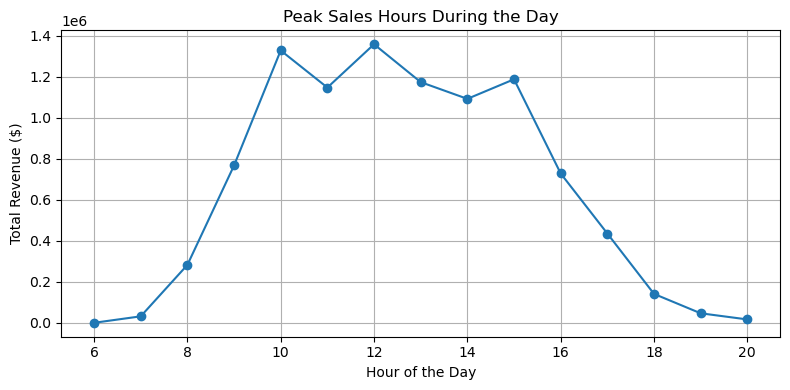

In [36]:
plt.figure(figsize=(8,4))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Peak Sales Hours During the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
#Most Profitable Products (Quantity × Unit Price)
 
product_profit = df.groupby('Description', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)

top_profitable_products = product_profit.head(10)
print("\n💰 Top 10 Most Profitable Products:")
print(top_profitable_products)


💰 Top 10 Most Profitable Products:
                             Description  TotalPrice
1098                      DOTCOM POSTAGE   206245.48
2915            REGENCY CAKESTAND 3 TIER   164459.49
3918  WHITE HANGING HEART T-LIGHT HOLDER    99612.42
2471                       PARTY BUNTING    98243.88
1866             JUMBO BAG RED RETROSPOT    92175.79
2803                  RABBIT NIGHT LIGHT    66661.63
2753                             POSTAGE    66230.64
2439     PAPER CHAIN KIT 50'S CHRISTMAS     63715.24
244        ASSORTED COLOUR BIRD ORNAMENT    58792.42
773                        CHILLI LIGHTS    53746.66


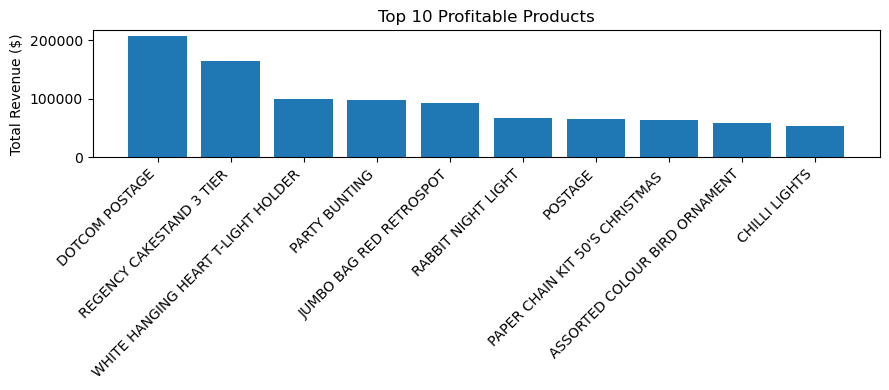

In [38]:
plt.figure(figsize=(9,4))
plt.bar(top_profitable_products['Description'], top_profitable_products['TotalPrice'])
plt.title('Top 10 Profitable Products')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
 #Average Unit Price by Product or Country
avg_price_product = df.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False)
avg_price_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

print("\n🏷️ Average Unit Price by Product (Top 5):")
print(avg_price_product.head(5))

print("\n🌍 Average Unit Price by Country (Top 5):")
print(avg_price_country.head(5))


🏷️ Average Unit Price by Product (Top 5):
Description
AMAZON FEE                        7324.784706
PICNIC BASKET WICKER 60 PIECES     649.500000
CRUK Commission                    495.839375
Manual                             378.207160
DOTCOM POSTAGE                     290.905585
Name: UnitPrice, dtype: float64

🌍 Average Unit Price by Country (Top 5):
Country
Singapore    109.645808
Hong Kong     43.043662
Portugal       8.616510
Cyprus         6.350311
Canada         6.030331
Name: UnitPrice, dtype: float64


In [40]:
#Discounts or Pricing Inconsistencies

price_variation = df.groupby('Description')['UnitPrice'].nunique()
price_inconsistencies = price_variation[price_variation > 1]

print(f"\n⚠️ Number of Products with Pricing Inconsistencies: {len(price_inconsistencies)}")
print("Example Products with Different Unit Prices:")
print(price_inconsistencies.head(10))


⚠️ Number of Products with Pricing Inconsistencies: 3442
Example Products with Different Unit Prices:
Description
4 PURPLE FLOCK DINNER CANDLES       4
50'S CHRISTMAS GIFT BAG LARGE       3
DOLLY GIRL BEAKER                   3
I LOVE LONDON MINI BACKPACK         3
NINE DRAWER OFFICE TIDY             3
OVAL WALL MIRROR DIAMANTE           7
RED SPOT GIFT BAG LARGE             3
SET 2 TEA TOWELS I LOVE LONDON     11
SPACEBOY BABY GIFT SET              4
TRELLIS COAT RACK                   3
Name: UnitPrice, dtype: int64


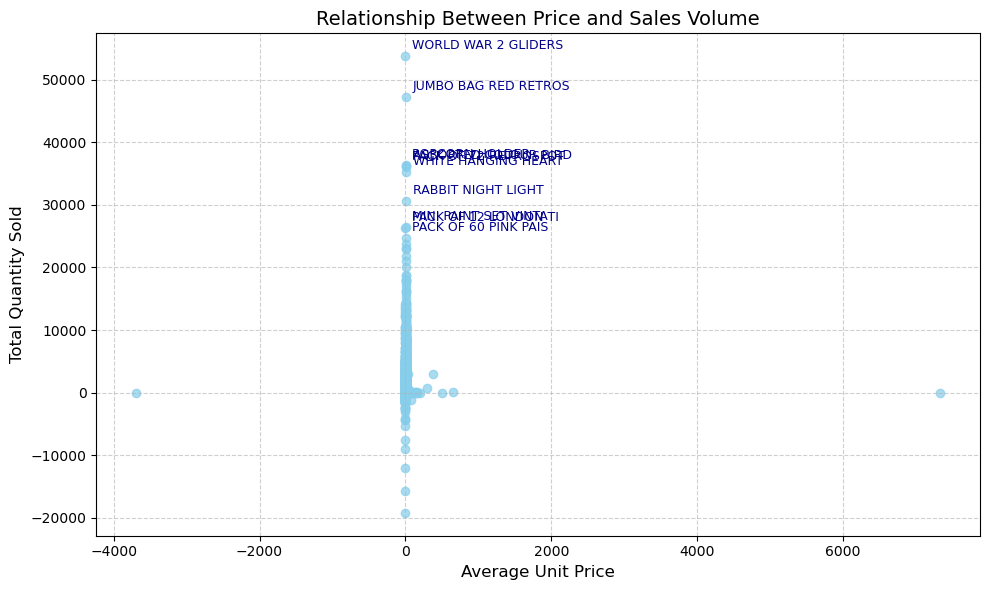

In [41]:
#Relationship Between Price and Sales Volume
product_summary = df.groupby('Description', as_index=False).agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum'
})

plt.figure(figsize=(10,6))
plt.scatter(product_summary['UnitPrice'], product_summary['Quantity'], color='skyblue', alpha=0.7)

plt.title('Relationship Between Price and Sales Volume', fontsize=14)
plt.xlabel('Average Unit Price', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Add labels for top-selling products (optional: top 10 by Quantity) ---
top_products = product_summary.sort_values(by='Quantity', ascending=False).head(10)

for _, row in top_products.iterrows():
    plt.annotate(
        row['Description'][:20],  # limit label length to 20 chars
        (row['UnitPrice'], row['Quantity']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='darkblue'
    )

plt.tight_layout()
plt.show()

In [43]:
#Summarize by product
product_summary = df.groupby('Description', as_index=False).agg({
    'UnitPrice': 'mean',    # Average price per product
    'Quantity': 'sum'       # Total quantity sold
})

# --- Compute correlation ---
correlation = product_summary['UnitPrice'].corr(product_summary['Quantity'])

# --- Interpretation ---
print(f" Correlation between Price and Sales Volume: {correlation:.4f}")

if correlation > 0:
    print("Positive relationship: higher prices are associated with higher sales volume.")
elif correlation < 0:
    print("Negative relationship: higher prices are associated with lower sales volume.")
else:
    print("No clear relationship between price and sales volume.")

 Correlation between Price and Sales Volume: -0.0085
Negative relationship: higher prices are associated with lower sales volume.


In [46]:
#Number of unique customers per country
customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

#Number of invoices per country
invoices_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

#Country with highest number of customers
top_customer_country = customers_by_country.index[0]
top_customer_count = customers_by_country.iloc[0]

#Country with highest number of invoices
top_invoice_country = invoices_by_country.index[0]
top_invoice_count = invoices_by_country.iloc[0]

print(f" Country with the Highest Number of Customers: {top_customer_country} ({top_customer_count} customers)")
print(f" Country with the Highest Number of Invoices: {top_invoice_country} ({top_invoice_count} invoices)")

 Country with the Highest Number of Customers: United Kingdom (3950 customers)
 Country with the Highest Number of Invoices: United Kingdom (23494 invoices)


In [47]:
print("\nTop 5 Countries by Customers:")
print(customers_by_country.head())

print("\nTop 5 Countries by Invoices:")
print(invoices_by_country.head())


Top 5 Countries by Customers:
Country
United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Name: CustomerID, dtype: int64

Top 5 Countries by Invoices:
Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Name: InvoiceNo, dtype: int64


In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

#Aggregate total sales per day
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
daily_sales.rename(columns={'InvoiceDate': 'Date', 'TotalPrice': 'Revenue'}, inplace=True)

# Prepare features for regression (convert dates to sequential numbers) ---
daily_sales['DayNumber'] = np.arange(len(daily_sales))
X = daily_sales[['DayNumber']]
y = daily_sales['Revenue']

#Train a simple linear regression model 
model = LinearRegression()
model.fit(X, y)

# Predict next 30 days 
future_days = np.arange(len(daily_sales), len(daily_sales) + 30)
future_predictions = model.predict(future_days.reshape(-1, 1))

# Create a complete forecast DataFrame with future dates ---
last_date = pd.to_datetime(daily_sales['Date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

#Combine with historical data
full_forecast = pd.concat([
    daily_sales[['Date', 'Revenue']].rename(columns={'Revenue': 'Actual_Revenue'}),
    forecast_df
], ignore_index=True)

#Display full forecast
print("🔮 Forecast for the Next 30 Days:")
print(forecast_df.to_string(index=False))  # shows all 30 predicted days

# checking model trend strength
r2 = model.score(X, y)
print(f"\n📈 Model R² (trend strength): {r2:.3f}")


🔮 Forecast for the Next 30 Days:
      Date  Predicted_Revenue
2011-12-10       44547.724534
2011-12-11       44630.464254
2011-12-12       44713.203974
2011-12-13       44795.943694
2011-12-14       44878.683414
2011-12-15       44961.423134
2011-12-16       45044.162854
2011-12-17       45126.902574
2011-12-18       45209.642294
2011-12-19       45292.382014
2011-12-20       45375.121733
2011-12-21       45457.861453
2011-12-22       45540.601173
2011-12-23       45623.340893
2011-12-24       45706.080613
2011-12-25       45788.820333
2011-12-26       45871.560053
2011-12-27       45954.299773
2011-12-28       46037.039493
2011-12-29       46119.779212
2011-12-30       46202.518932
2011-12-31       46285.258652
2012-01-01       46367.998372
2012-01-02       46450.738092
2012-01-03       46533.477812
2012-01-04       46616.217532
2012-01-05       46698.957252
2012-01-06       46781.696972
2012-01-07       46864.436692
2012-01-08       46947.176411

📈 Model R² (trend strength): 0.176


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   Future_Day  Predicted_Revenue
0         305       44547.724534
1         306       44630.464254
2         307       44713.203974
3         308       44795.943694
4         309       44878.683414
